In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kurzfassung

## Mean

5.0
[3.18181818 6.81818182]


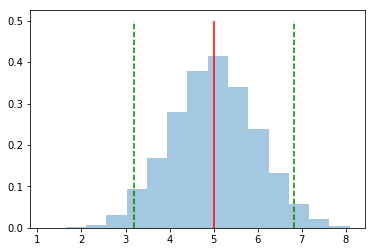

In [33]:
### KURZFASSUNG 
np.random.seed(seed=0)

observed_sample = [0,1,2,3,4,5,6,7,8,9,10]
stat = np.mean
#stat = lambda a: np.percentile(a=a,q=95)  # Bootstrapping für 95% Quantil
bs_samples = np.random.choice(observed_sample, size=[10000,len(observed_sample)], replace=True)
bs_stats = np.apply_along_axis(stat, arr=bs_samples, axis=1)

## Schätzung für Mittelwert
estimate = np.percentile(bs_stats,q=[50])[0]
print(estimate)
## 95% Bootstrap-Konfidenzintervall
conf_int = np.percentile(bs_stats,q=[2.75, 97.25])
print(conf_int)

## Boostrap-Approximation der Sampling Distribution
sns.distplot(bs_stats,bins=15, kde=False, norm_hist=True)
plt.vlines(estimate, ymin=0, ymax=.5, colors='r')
plt.vlines(conf_int, ymin=0, ymax=.5, colors='g', linestyles='dashed')

## Proportion

0.62
[0.555 0.685]


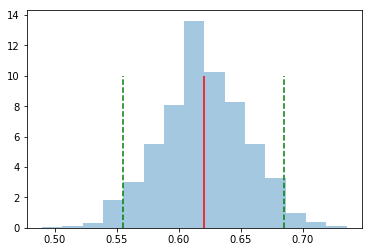

In [34]:
events      = 124
trials      = 200
proportion  = events / trials

observed_sample = np.append(
    np.zeros(trials - events),
    np.ones(events))

bs_samples = np.random.choice(observed_sample, size=[10000,len(observed_sample)], replace=True)
bs_stats = np.apply_along_axis(stat, arr=bs_samples, axis=1)

## Schätzung für Proportion
estimate = np.percentile(bs_stats,q=[50])[0]
print(estimate)
## 95% Bootstrap-Konfidenzintervall
conf_int = np.percentile(bs_stats,q=[2.75, 97.25])
print(conf_int)

## Boostrap-Approximation der Sampling Distribution
sns.distplot(bs_stats,bins=15, kde=False, norm_hist=True)
plt.vlines(estimate, ymin=0, ymax=10, colors='r')
plt.vlines(conf_int, ymin=0, ymax=10, colors='g', linestyles='dashed')

# Intuition

In [3]:
#### Generieren eines bootstrap-sample
def bootstrap_sample(sample):
    return np.random.choice(sample,len(sample),replace=True)

In [4]:
#### Generieren der Approximation der Sampling-Distribution
def bootstrap_stats(size, sample):
    b = np.array([])
    for i in range(size):
        b = np.append(b, bootstrap_sample(sample).mean())   # Für Mittelwert
    return b
    

In [5]:
bstats = bootstrap_stats(10000,observed_sample)
bstats[1:10]

array([2.54545455, 4.        , 5.18181818, 5.63636364, 6.09090909,
       6.27272727, 4.81818182, 6.09090909, 4.72727273])

0.9402752315542402

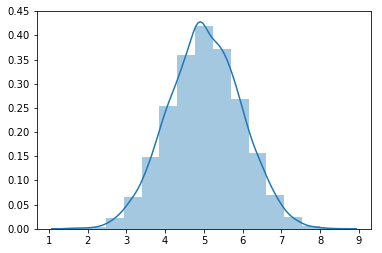

In [6]:
sns.distplot(bstats,bins=15)
np.std(bstats)

In [7]:
## Schätzung für Mittelwert
print(np.percentile(bstats,q=[50]))

#### 95% Bootstrap-Konfidenzintervall
print(np.percentile(bstats,q=[2.75, 97.25]))

[5.]
[3.18181818 6.81818182]
